In [1]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM


ImportError: cannot import name 'fit_optimizer_regression' from 'EMDPM.optimizer_cognitive_regression' (/home/dsemchin/Progression_models_simulations/EMDPM/optimizer_cognitive_regression.py)

true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.01180732 0.02811759 0.01295502 0.
 0.         0.01207637 0.01270366 0.        ]


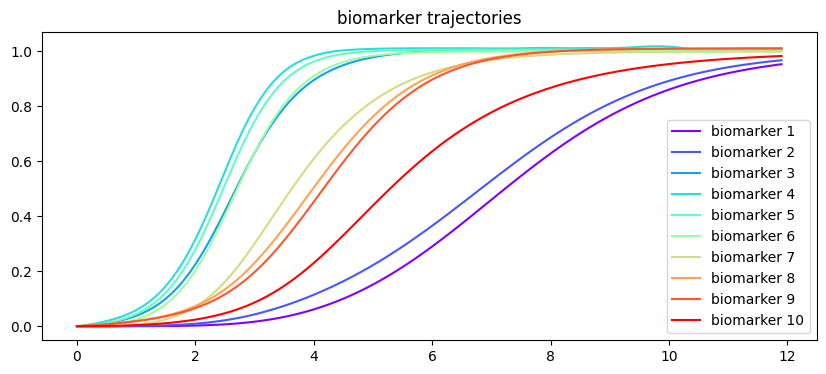

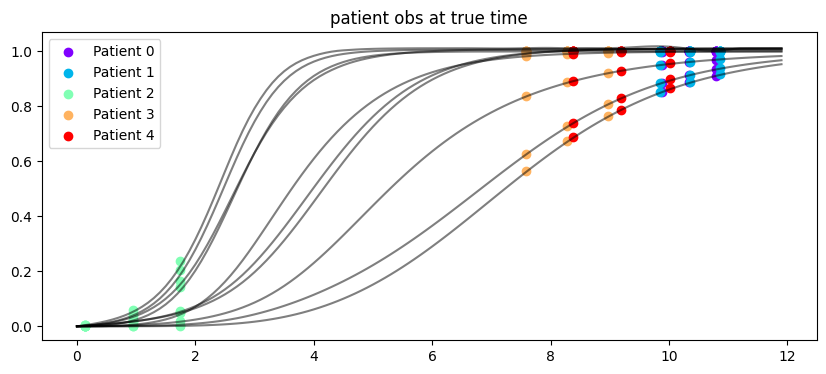

 23%|██▎       | 7/30 [00:18<00:57,  2.49s/it]

100%|██████████| 30/30 [01:41<00:00,  3.40s/it]


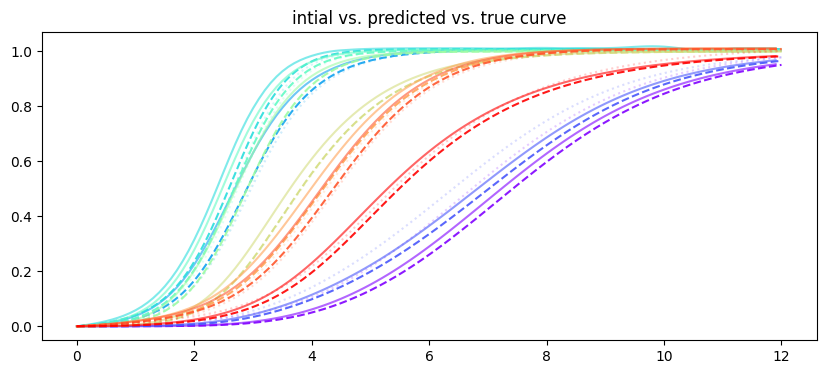

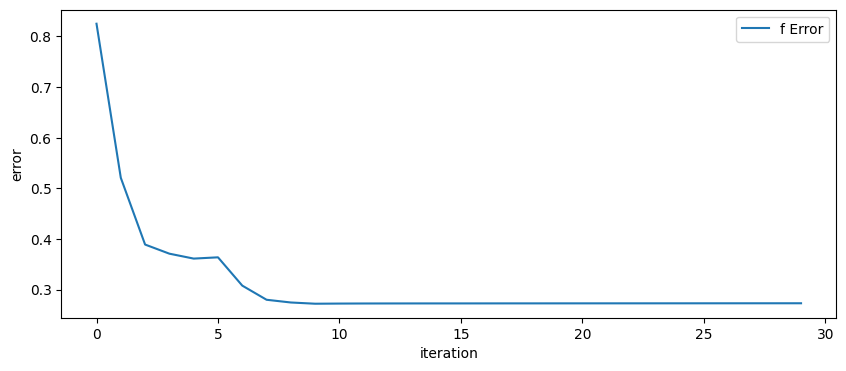

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


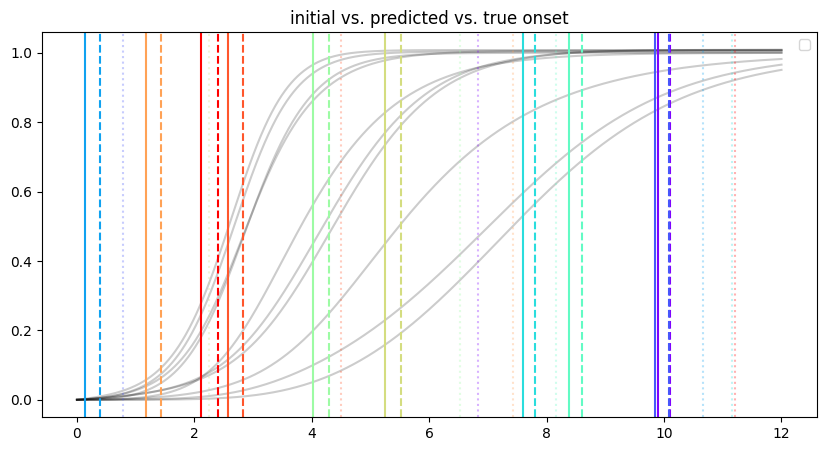

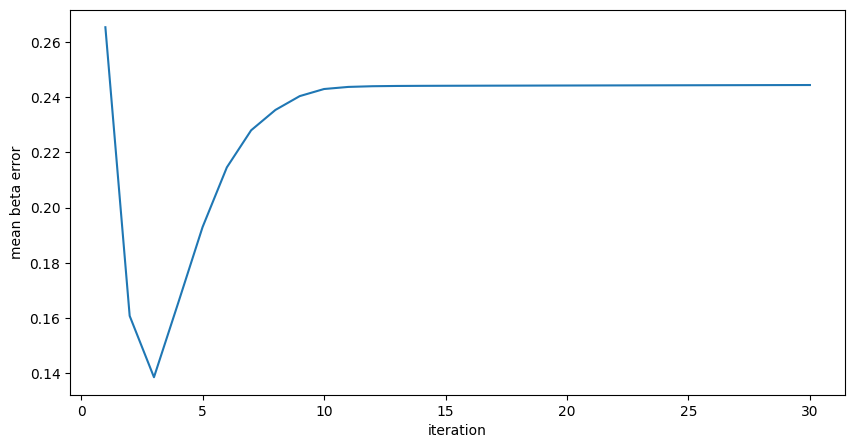

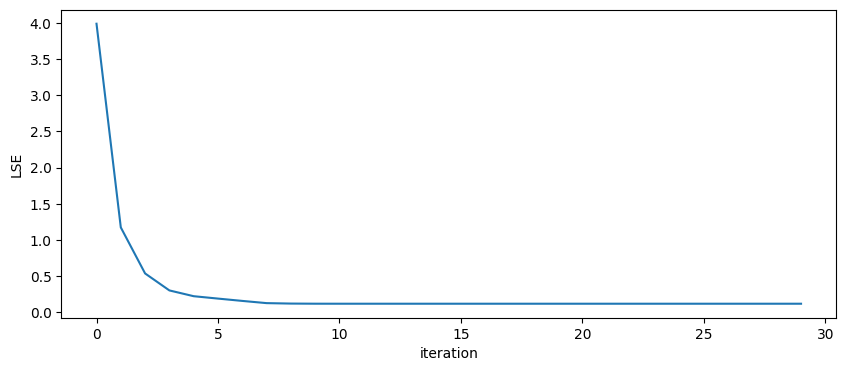

In [2]:
seed = 75
np.random.seed(seed)
random.seed(seed)

# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max, seed=seed)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
    seed = seed
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model_0 = EM(K=K,
              num_iterations=30,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              alpha=1.0,
              lambda_cog=0.0
              )

em_model_0.fit(df)

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations, f)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 

## Alpha = 0.01

  0%|          | 0/30 [00:00<?, ?it/s]

 13%|█▎        | 4/30 [00:27<02:58,  6.85s/it]

100%|██████████| 30/30 [02:26<00:00,  4.88s/it]


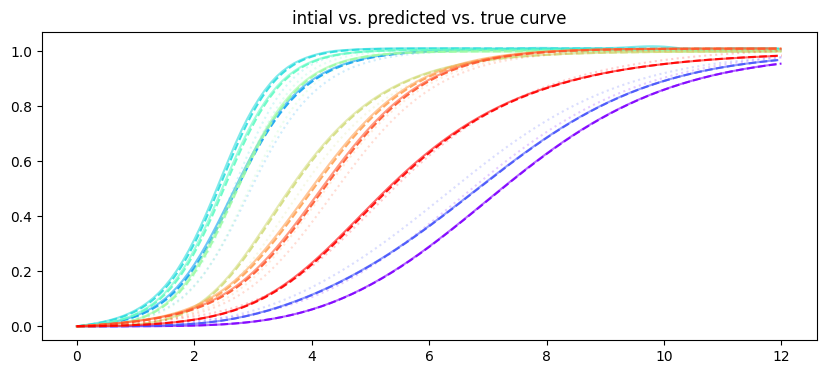

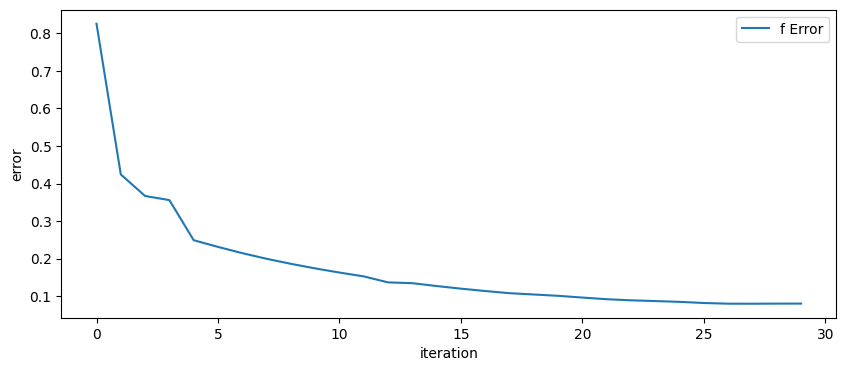

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


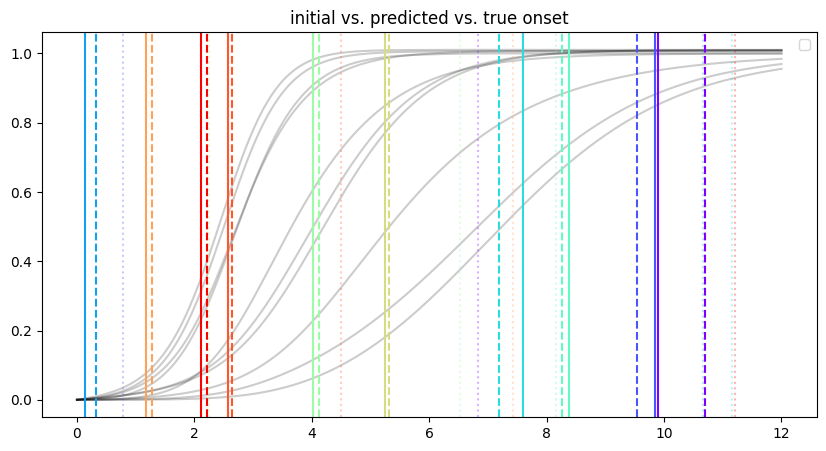

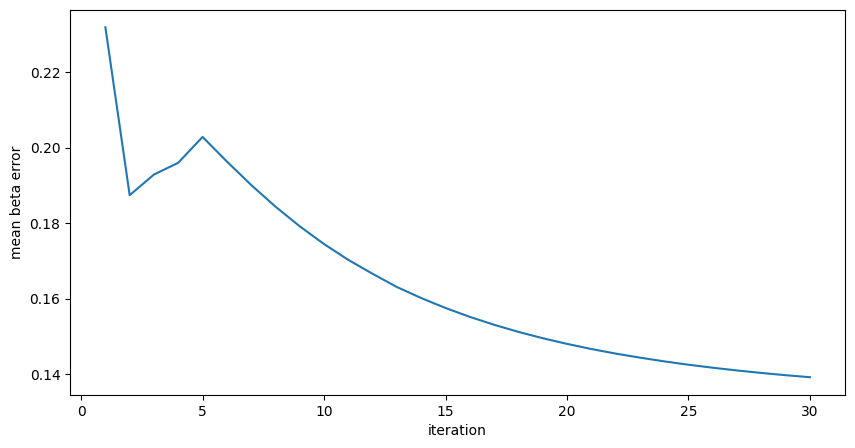

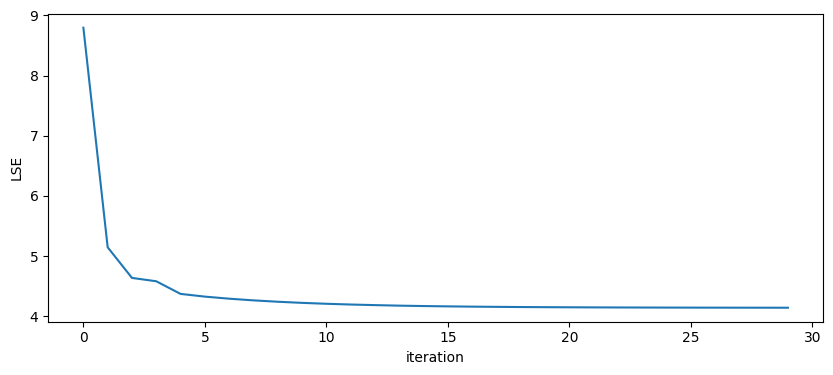

In [3]:
em_model_0 = EM(K=K,
              num_iterations=30,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              alpha=1.0,
              lambda_cog=0.01
              )

em_model_0.fit(df)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations, f)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 

## alpha = 0.1

  0%|          | 0/30 [00:00<?, ?it/s]

  7%|▋         | 2/30 [00:12<02:56,  6.31s/it]

100%|██████████| 30/30 [01:55<00:00,  3.86s/it]


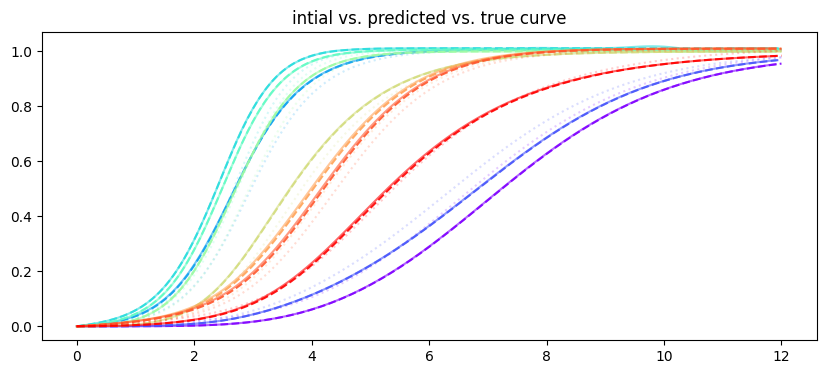

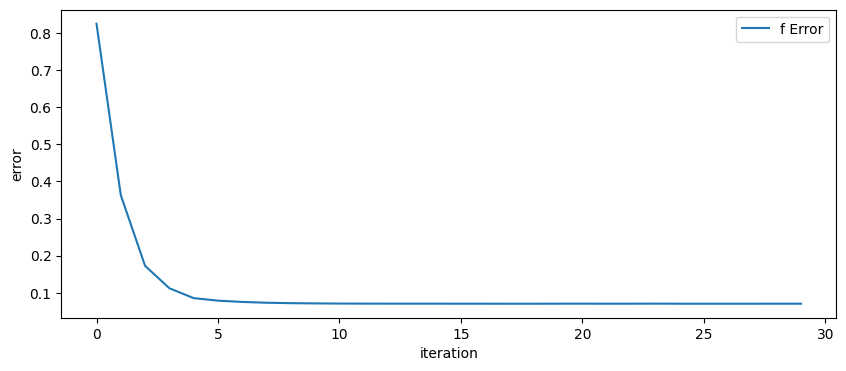

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


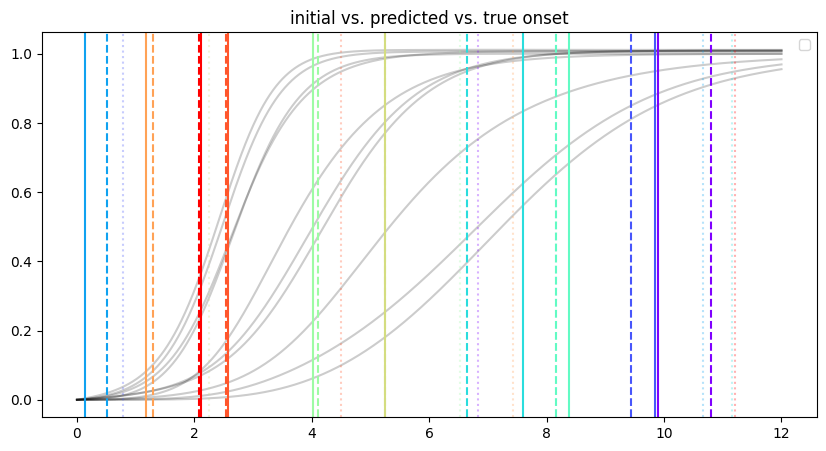

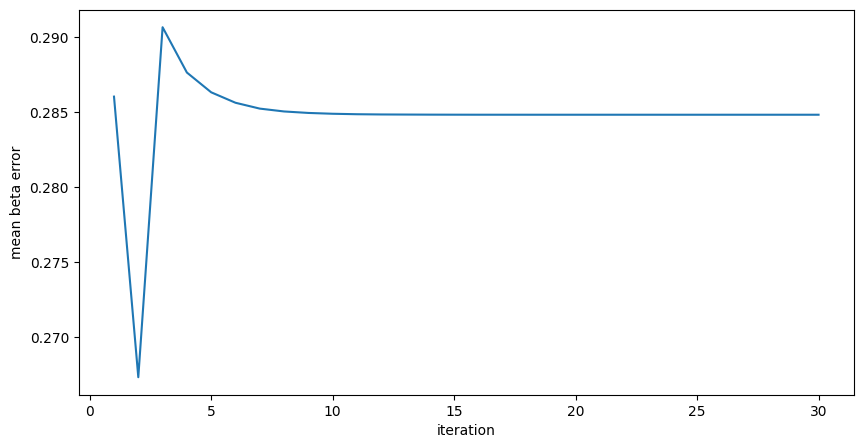

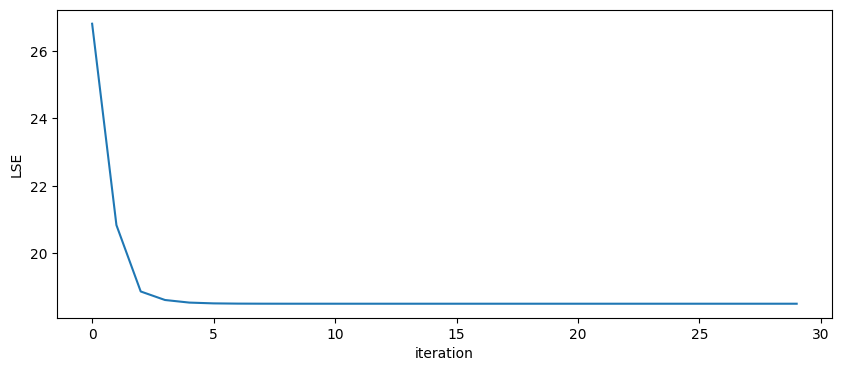

In [4]:
em_model_0 = EM(K=K,
              num_iterations=30,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              alpha=1.0,
              lambda_cog=0.1
              )

em_model_0.fit(df)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations, f)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 

## alpha = 1.0

  0%|          | 0/30 [00:00<?, ?it/s]

  3%|▎         | 1/30 [00:04<02:23,  4.96s/it]

100%|██████████| 30/30 [01:32<00:00,  3.09s/it]


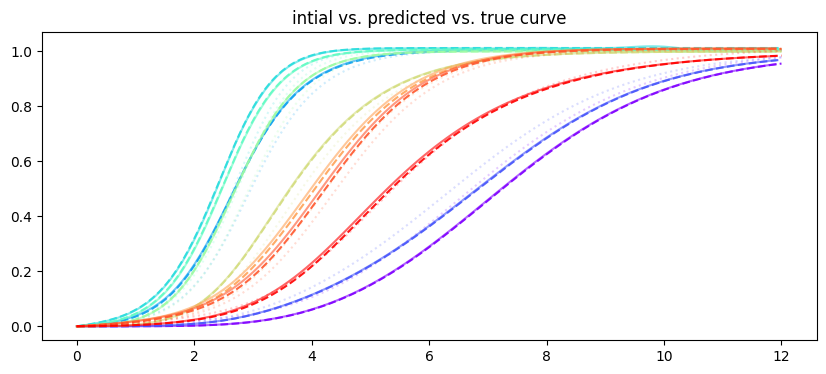

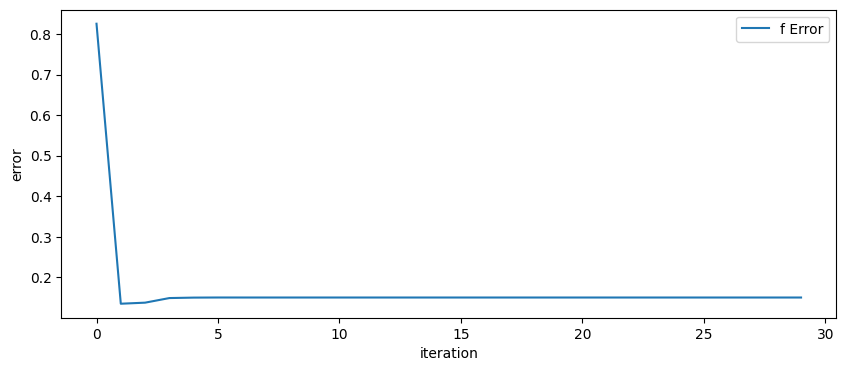

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


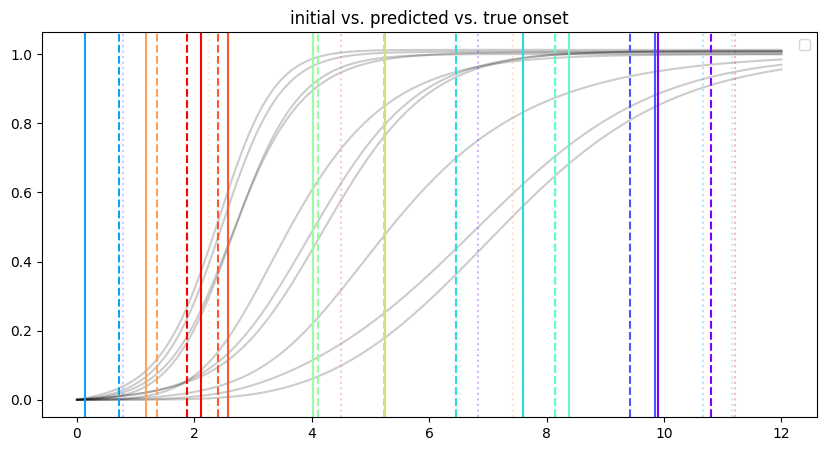

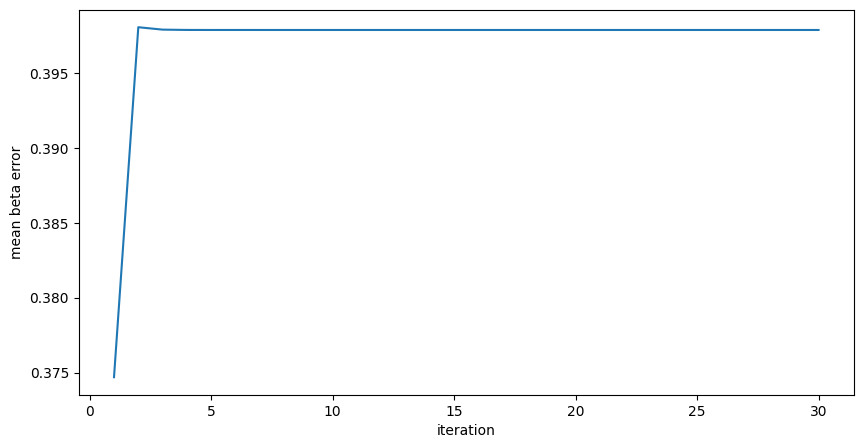

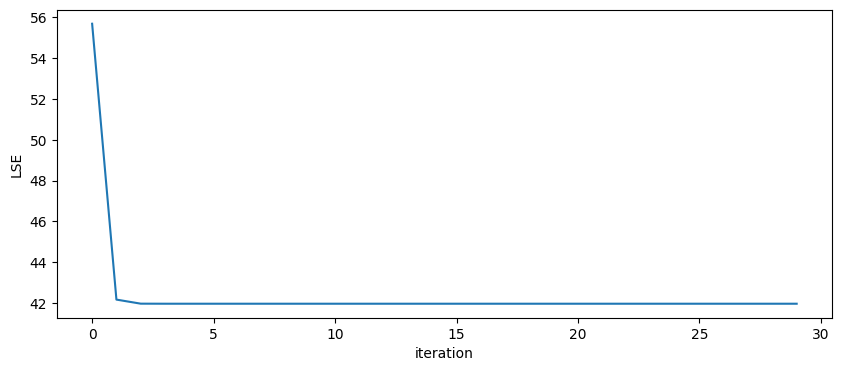

In [5]:
em_model_0 = EM(K=K,
              num_iterations=30,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              alpha=1.0,
              lambda_cog=1.0
              )

em_model_0.fit(df)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations, f)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 

## alpha = 10

 13%|█▎        | 4/30 [00:16<01:46,  4.11s/it]

100%|██████████| 30/30 [01:23<00:00,  2.78s/it]


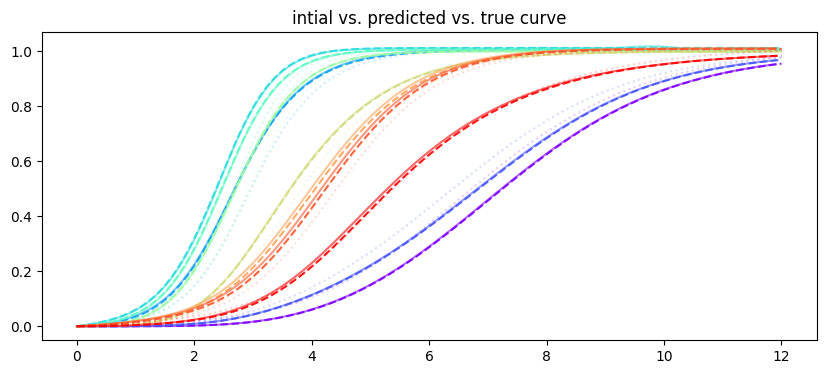

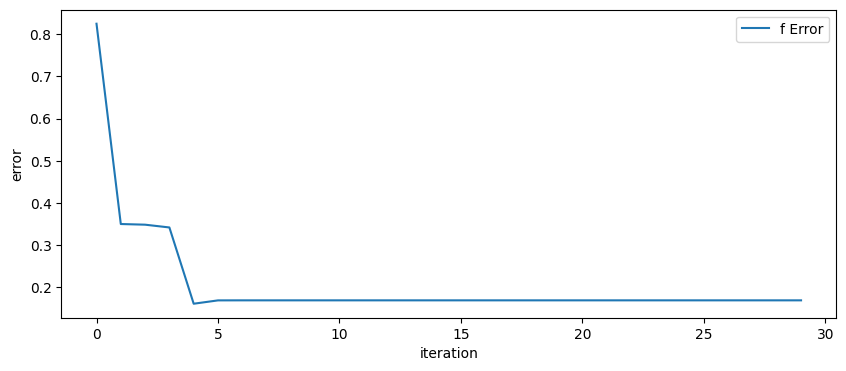

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


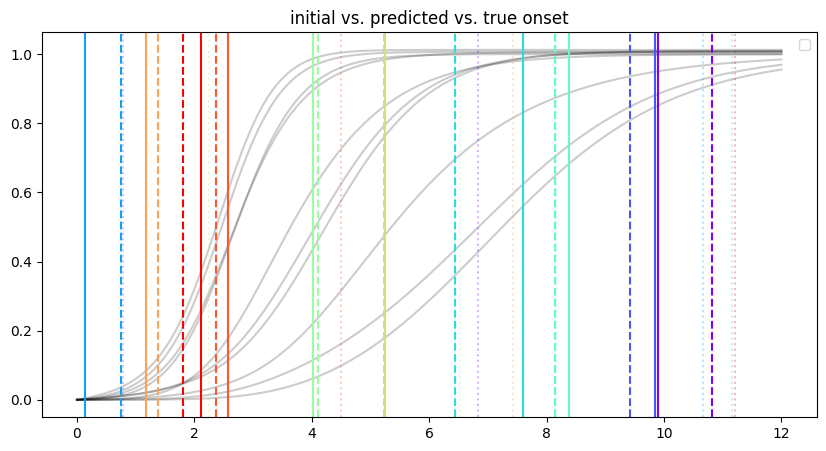

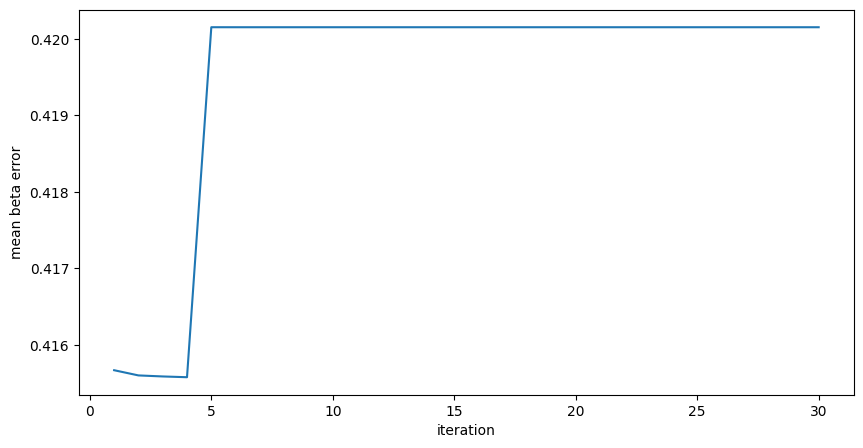

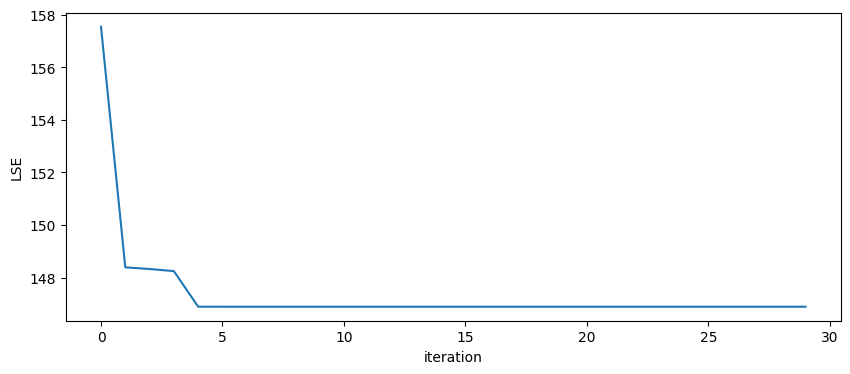

In [6]:
em_model_0 = EM(K=K,
              num_iterations=30,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              alpha=1.0,
              lambda_cog=10.0
              )

em_model_0.fit(df)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations, f)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 

## alpha = 100

 13%|█▎        | 4/30 [00:14<01:32,  3.56s/it]

100%|██████████| 30/30 [01:39<00:00,  3.33s/it]


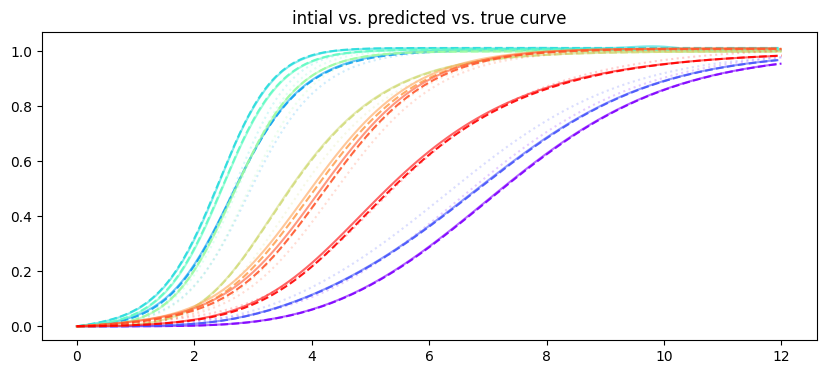

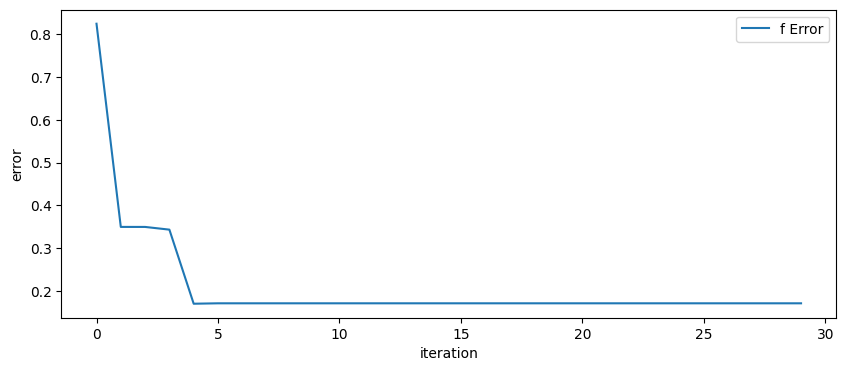

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


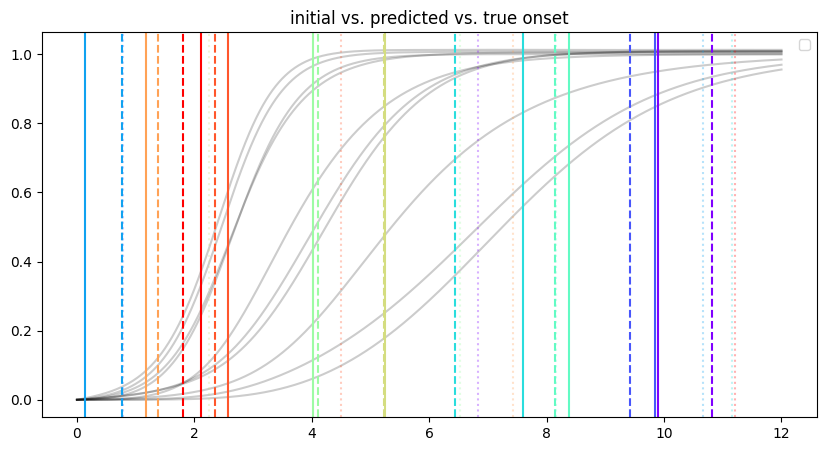

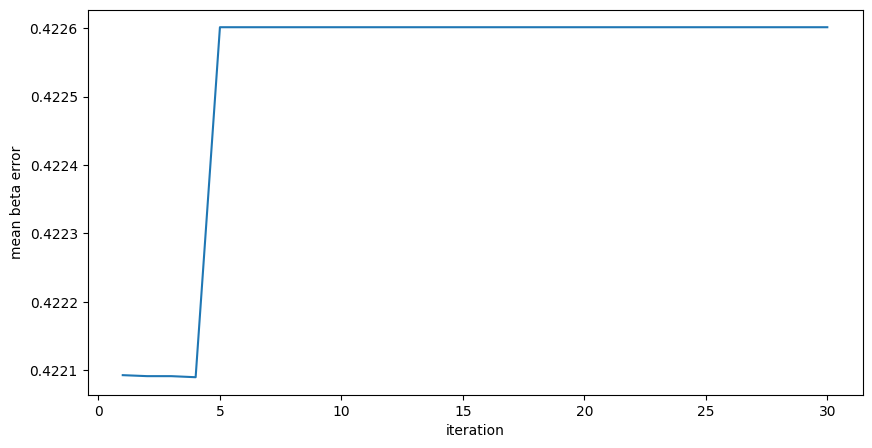

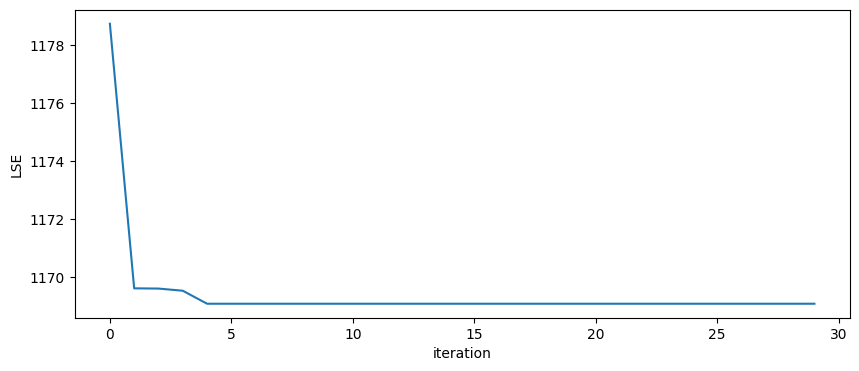

In [7]:
em_model_0 = EM(K=K,
              num_iterations=30,
              t_max=t_max,
              step=0.01,
              use_jacobian=True,
              alpha=1.0,
              lambda_cog=100.0
              )

em_model_0.fit(df)

# Visualize final vs. initial theta fit
x0_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model_0.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model_0.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model_0.theta_iter_, n_biomarkers, em_model_0.num_iterations, f)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_) 